In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
dataset_name = "cats_vs_dogs"
dataset, info = tfds.load(dataset_name, as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.DEAFI0_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [3]:
train_data, test_data = dataset['train'].take(20000), dataset['train'].skip(20000)

In [4]:
def preprocess(image, label):
    image = tf.image.resize(image, (128, 128)) / 255.0  # Resize & Normalize
    return image, label

In [5]:
train_data = train_data.map(preprocess).shuffle(1000).batch(32)
test_data = test_data.map(preprocess).batch(32)

In [6]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [9]:
history = model.fit(train_data, epochs=30, validation_data=test_data, callbacks=[early_stopping])

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 369s 585ms/step - accuracy: 0.5978 - loss: 0.6587 - val_accuracy: 0.7330 - val_loss: 0.5286
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 386s 617ms/step - accuracy: 0.7445 - loss: 0.5203 - val_accuracy: 0.7600 - val_loss: 0.4866
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 363s 580ms/step - accuracy: 0.7854 - loss: 0.4624 - val_accuracy: 0.7814 - val_loss: 0.4508
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 368s 588ms/step - accuracy: 0.8003 - loss: 0.4321 - val_accuracy: 0.7848 - val_loss: 0.4355
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 367s 586ms/step - accuracy: 0.8188 - loss: 0.4027 - val_accuracy: 0.8102 - val_loss: 0.4132
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 358s 572ms/step - accuracy: 0.8315 - loss: 0.3805 - val_accuracy: 0.8164 - val_loss: 0.3858
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 390s 586ms/step - accuracy: 0.8415 - loss: 0.3636 - val_accuracy: 0.8216 - val_loss: 0.3802
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 367s 586ms/step - accuracy: 0.8537 -

In [10]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.4f}")

102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 162ms/step - accuracy: 0.8555 - loss: 0.3535
Test Accuracy: 0.8498


In [11]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

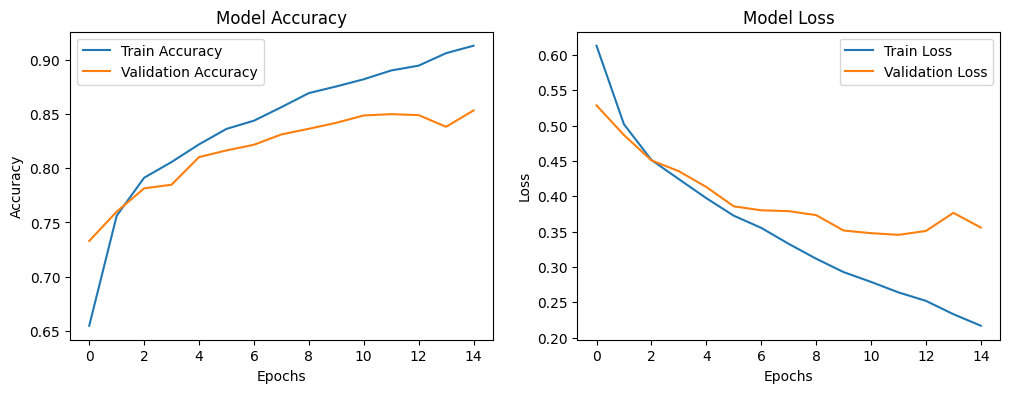

In [12]:

plot_history(history)